# <center>**Indeed **

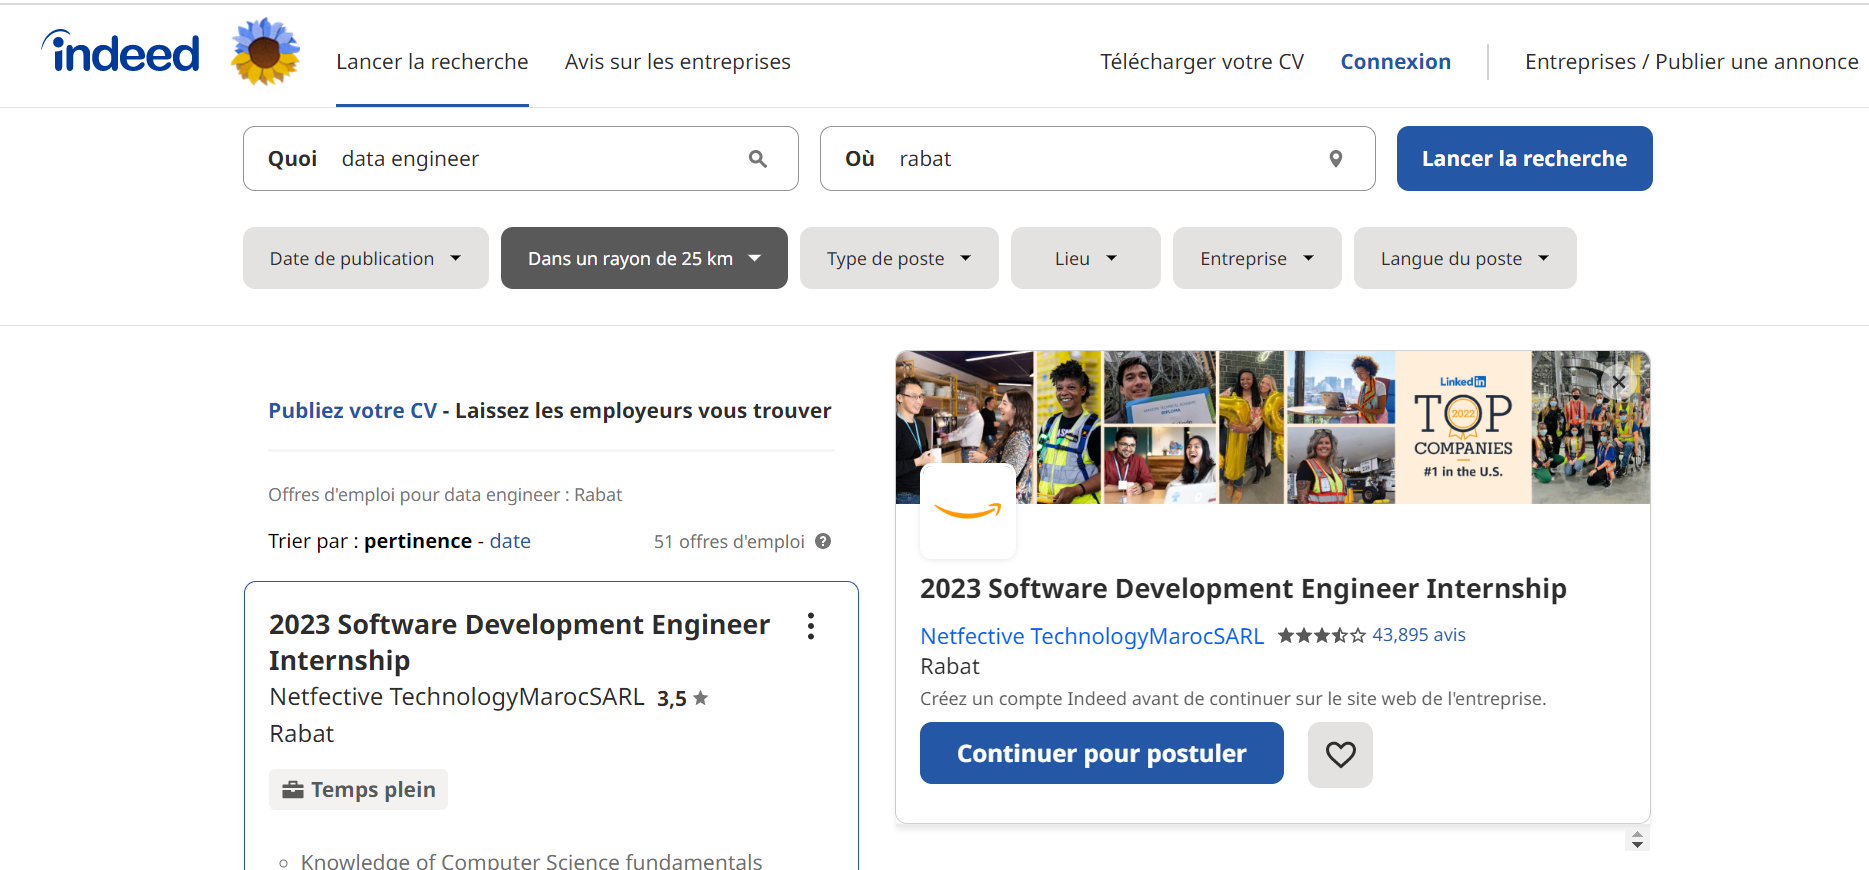

In [1]:
# First import the necessary libraries
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.edge.options import Options as EdgeOptions
import csv
import re

In [91]:
!pip install webdriver_manager


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
# Define a Edge webdriver 
from webdriver_manager.microsoft import EdgeChromiumDriverManager
browser = webdriver.Edge(EdgeChromiumDriverManager().install())

C:\Users\hajar\AppData\Local\Temp\ipykernel_18368\3594609464.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Edge(EdgeChromiumDriverManager().install())


In [94]:
# Giving the url of morocco indeed
url = "https://ma.indeed.com/?r=us"
# Use the get methode to move the webdriver to the previous url
browser.get(url)

In [95]:
# ping on the search zone
search_bar = browser.find_element_by_name("q")
search_bar.clear()

C:\Users\hajar\AppData\Local\Temp\ipykernel_18368\2235961780.py:2: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  search_bar = browser.find_element_by_name("q")


In [96]:
#type your job, --> ex: data analyst
keyword = "Data Engineer"
print("looking for",keyword)
search_bar.send_keys(keyword)
search_bar.send_keys(Keys.RETURN)
browser.current_url

looking for Data Engineer


'https://ma.indeed.com/jobs?q=Data%20Engineer&l=&from=searchOnHP'

In [86]:
# Initialize an empty liste to contain the likns of all postes
links=[]

In [87]:
# Make a loop with the number of pages you want to scrall
for i in range(5):
    liste_links=browser.find_elements(By.XPATH,"//ul[contains(@class, 'jobsearch-ResultsList css-0')]/li//h2[contains(@class, 'jobTitle css-1h4a4n5 eu4oa1w0')]//a")
    for link in liste_links:
        links.append(link.get_attribute("href"))
    try:    
        next_page = browser.find_elements(By.XPATH,"//div[contains(@class, 'css-tvvxwd ecydgvn1')]/a[contains(@aria-label, 'Next Page')]")
        next_page[0].click()
    except Exception as e:
        print(e)

In [89]:
# show the links
links

['https://ma.indeed.com/company/Queto/jobs/Trainee-Data-Engineers-Data-Scientists-c7f440e170271423?fccid=a76036ea0f3f4325&vjs=3',
 'https://ma.indeed.com/rc/clk?jk=1bfda93fb125e392&fccid=de71a49b535e21cb&vjs=3',
 'https://ma.indeed.com/rc/clk?jk=62addff572f8f5fb&fccid=c08e3f14d662230d&vjs=3',
 'https://ma.indeed.com/rc/clk?jk=6b9a844f60131359&fccid=105ecfd0283f415f&vjs=3',
 'https://ma.indeed.com/rc/clk?jk=da615c2286ce676d&fccid=a39549c85aefc9a6&vjs=3',
 'https://ma.indeed.com/company/Admiral-Digital-Consulting/jobs/Consultant-Data-Engineer-d54c296ac2222b4a?fccid=591e806e50393951&vjs=3',
 'https://ma.indeed.com/rc/clk?jk=e68e4dab8908ed6c&fccid=c18daf68fbd3c338&vjs=3',
 'https://ma.indeed.com/company/AFRICAWORK/jobs/Production-Engineer-c848534cb08b518d?fccid=5f39cbbbfe44d968&vjs=3',
 'https://ma.indeed.com/rc/clk?jk=d324caa1c9a28159&fccid=a89c98099999a09c&vjs=3',
 'https://ma.indeed.com/rc/clk?jk=9b2cec7749454f27&fccid=105ecfd0283f415f&vjs=3',
 'https://ma.indeed.com/rc/clk?jk=f09c61f22

In [97]:
def scrape(keyword):
    # Initialize the empty lists to contain : job title, publication time, description of the poste, the company and the location
    jobs=[]
    time_publication=[]
    description=[]
    companies=[]
    Locations=[]
    try:
        for link in links:
            browser.get(link)
            if browser.find_element(By.XPATH,"//h1[contains(@class, 'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title')]/span[contains(@role,'text')]").text is None:
                jobs.append('Nane')
            else:
                jobs.append(browser.find_element(By.XPATH,"//h1[contains(@class, 'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title')]/span").text)

        for link in links:
            browser.get(link)
            if browser.find_element(By.XPATH,"//li[contains(@class, 'css-5vsc1i eu4oa1w0')]/span[contains(@class, 'css-kyg8or eu4oa1w0')]").text.split('a')[1] is None:
                time_publication.append('Nane')
            else:
                time_publication.append(browser.find_element(By.XPATH,"//li[contains(@class, 'css-5vsc1i eu4oa1w0')]/span[contains(@class, 'css-kyg8or eu4oa1w0')]").text.split('a')[1])
        for link in links:
            browser.get(link)
            if browser.find_element(By.XPATH,"//div[contains(@class, 'jobsearch-jobDescriptionText')]").text is None:
                description.append('Nane')
            else:
                description.append(browser.find_element(By.XPATH,"//div[contains(@class, 'jobsearch-jobDescriptionText')]").text)
        for link in links:
            browser.get(link)
            if browser.find_element(By.XPATH,"//div[contains(@data-company-name,'true')]").text is None:
                companies.append('Nane')
            else:
                companies.append(browser.find_element(By.XPATH,"//div[contains(@data-company-name,'true')]").text)
        for link in links:
            browser.get(link)
            if browser.find_element(By.XPATH,"//div[contains(@class,'jobsearch-CompanyInfoWithoutHeaderImage')]/div/div").text is None:
                Locations.append('Nane')
            else:
                if len(browser.find_element(By.XPATH,"//div[contains(@class,'jobsearch-CompanyInfoWithoutHeaderImage')]/div/div").text.split('\n'))==1:
                    Locations.append(browser.find_element(By.XPATH,"//div[contains(@class,'jobsearch-CompanyInfoWithoutHeaderImage')]/div/div").text.split('\n')[0])
                else:
                    Locations.append(browser.find_element(By.XPATH,"//div[contains(@class,'jobsearch-CompanyInfoWithoutHeaderImage')]/div/div").text.split('\n')[1])
        d={"jobs":jobs,"time_publication":time_publication,"description":description,"Company":companies,"Location":Locations}
        # regroupe the data in a dataframe and load it in a csv file
        data=pd.DataFrame(d)
        data.to_csv('{}.csv'.format(keyword))
    except Exception as e:
        print(e)

In [98]:
scrape('data_engineer')

Message: no such element: Unable to locate element: {"method":"xpath","selector":"//h1[contains(@class, 'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title')]/span[contains(@role,'text')]"}
  (Session info: MicrosoftEdge=109.0.1518.78)
Stacktrace:
Backtrace:
	Microsoft::Applications::Events::EventProperties::SetProperty [0x00007FF772DB16C2+15186]
	Microsoft::Applications::Events::EventProperty::EventProperty [0x00007FF772D4A212+827554]
	(No symbol) [0x00007FF772A0ED90]
	(No symbol) [0x00007FF772A52225]
	(No symbol) [0x00007FF772A523AC]
	(No symbol) [0x00007FF772A8E087]
	(No symbol) [0x00007FF772A71F8F]
	(No symbol) [0x00007FF772A44C3E]
	(No symbol) [0x00007FF772A8B513]
	(No symbol) [0x00007FF772A71D23]
	(No symbol) [0x00007FF772A43B80]
	(No symbol) [0x00007FF772A42B0E]
	(No symbol) [0x00007FF772A44344]
	Microsoft::Applications::Events::EventProperties::SetProperty [0x00007FF772C2C3B0+182752]
	(No symbol) [0x00007FF772B00095]
	Microsoft::Applications::Events::EventProperty:

In [1]:
# Import libraries
import numpy as np 
import pandas as pd

In [2]:
#data_scientist=pd.read_csv("data_scientist.csv")
data_engineer=pd.read_csv("dataEngineer.csv")
data_engineer

,Unnamed: 0,jobs,time_publication,description,Company,Location
0,0,"Data Engineer - QuantumBlack, AI by McKinsey",30+ jours,Who You'll Work With\nYou will be based in our...,McKinsey & Company,Casablanca
1,1,"Data Engineer Intern (remote – healthcare), Rabat",12 jours,Our client is an international innovative star...,Elite Recruitment Group,Rabat
2,2,Consultant Data Engineer,16 jours,La révolution numérique change tout. Elle tran...,Admiral Digital,Casablanca
3,3,Consultant Data Engineer,30+ jours,Postuler\nLa révolution numérique change tout....,Admiral,Casablanca
4,4,Developer/Software Engineer Intern,9 jours,TrouveTaVoie's Dev team members are the champi...,TrouveTaVoie,Casablanca
...,...,...,...,...,...,...
57,57,Offre: Ingénieur data analyst,30+ jours,Ingénieur data analyst30-01-2022Rekrute.com\n\...,NaN,Maroc
58,58,TE Community,30+ jours,"At TE, you will unleash your potential working...",TE Connectivity,Tanger Ibn Battouta Airport
59,59,SUPV II MAINTENANCE,30+ jours,TE Connectivity's Maintenance Teams perform re...,TE Connectivity,Tanger Ibn Battouta Airport
60,60,AD Software Engineer - Senior H/F,30+ jours,Détail de l'offre\nInformations générales\nEnt...,Stellantis,Casablanca


In [70]:
# Import libraries
import numpy as np 
import pandas as pd 

https://datascientest.com/data-engineer-tout-savoir


https://www.data-bird.co/metiers-data/data-engineer

In [71]:
# Data engineer Keywords

m=["Stockage de données",
"Traitement de données",
"Architecture de données",
"Analyse de données",
"Big Data",
"Cluster de calcul",
"Systèmes distribués",
"Bases de données",
"Moteurs de bases de données",
"Hadoop",
"NoSQL",
"Streaming de données",
"Visualisation de données",
"Intelligence artificielle",
"Apprentissage automatique",
"Migration de données",
"Sécurité de données",
"Scalabilité",
"Cloud computing",
"Python","Java","Scala",
"Infrastructure de données",
"Indexation de données",
"Optimisation de requêtes",
"Sauvegarde de données",
"Récupération de données",
"Plateformes en nuage",
"Traitement en temps réel",
"Gestion des données",
"Data warehousing",
"Apache Spark", 
"Apache Storm", "Apache Flink",
"MongoDB", "Cassandra", "Redis", 
"Apache Kafka","RabbitMQ"
"HDFS","GlusterFS", "Ceph",
"visualisation de données","Tableau","Power BI", "QlikView", 
"surveillance","Grafana","DataDog","New Relic", 

"l'architecture de données","la gestion de bases de données",
"Expérience dans la conception"," stockage de données" ,
"Compétences en programmation","Java", 
"clusters", 
"AWS","Google Cloud","Microsoft Azure",
"analyse de données","Apache Storm"," Apache Flink",
   
   
"Database design","NewSQL","data storage ",

"Data warehousing" ,"Snowflake",

"Data processing","Apache Kafka","real-time","data processing pipelines",

"Cloud computing","AWS","GCP","Azure", 

"Data visualization","data-driven",

"Data security",

"Project management",

"ETL" ,"extract", "transform", "load", 

"Data modeling"

"Big data processing",

"Data governance",

"Performance tuning","data storage systems","processing pipelines","data-driven applications",

"Scalability",
   
"Stockage de données", "Apache Cassandra"," Apache Hadoop", "Amazon S3", "Google Cloud Storage", "Microsoft Azure Storage",

"Bases de données","MySQL","PostgreSQL","Oracle","Microsoft SQL Server","Amazon Redshift",

"Processing de données","Apache Flink","Apache Beam",

"intégration de données","Apache NiFi","Talend","Informatica PowerCenter",

"Conteneurs et orchestration","Docker","Kubernetes","Apache Mesos",

"Visualisation de données","Tableau","QlikView","Power BI","Looker","TIBCO Spotfire",

"Terraform","CloudFormation","Ansible","Chef","Puppet","GitHub","GitLab","Git","pipeline","langage des bases de données","sql"
,"modélisation des données","big data","hbase","hive","probabilistes","probabilistes","Go","Julia","Perl","pipelines de données",
"pipelines","visualisations","Machine Learning","Deep Learning","Intelligence artificielle","DevOps","APIs","virtualisation",
"extraction de données","streaming temps réel","interrogation des données","streaming","Orienté colonne","clé","valeur",
 "Hadoop", "Spark", "Kafka","HBase","Cassandra","Hive","Pig","Oozie","Maven","Nexus","Git","Jenkins","Shell","VBA"," UNIX","Linux","Solaris","Windows",
"Teradata","Microsoft SQL Server","SAS Base","SAP Hana","Elasticsearch","HBase","Cassandra","Redshift","Talent open studio","Pig Latin","Sqoop","SQL","HiveQL",
"Kafka","OLAP","OLAtP","Excel","Tableau Software","QlikView","GCP","Azure HDInsight","AWS","Jenkins","git","GitHub","gitlab","création de CI/CD","docker","Ansible","kubernetes",
"Mapreduce","Impala", "Phoenix", "HAWQ","HCatalog","MongoDB","Cloudera","Spark Streaming","Kafka","Flume","MapReduce","MLib",
"R","Pig","Big Data Streaming","Structuration de la donnée","API","C++","Flink","LET","Unix","BigQuery","SnowFlake","Redshift","Azure",
 "GCP","Kubernetes","Airflow"," Luigi","Cloud","Data Lake","Data Warehouse","Data Warehouse","DataWarehouse","Amazon","Data Mart","cluster computing","Git","Azure Databricks",
"Azure Data Lake","Azure Data Factory","PySpark","JSON","Filter","Join","Simple Aggregations","GroupBy","Window functions"," Data Lakehouse",
"NumPy","Pandas","Matplotlib","Seaborn","visualisations de données","Scikit-Learn","Data Exploration","Visualizations",

"Neural Networks","Deep Learning",

"Model Evaluation","Analysis",

"Python","Tensorflow","Numpy",
"Scikit-Learn","Data Science","Machine Learning","Workflows","Data Visualization" ,"Transfer Learning",
"Image recognition","classification","cross validation",
"Supervised Learning","Classification","Regression","Time Series",
"Decision Trees","Random Forests",
"Ensemble Learning",
"Hyperparameter Tuning",
"Deep Learning","Neural Networks","TensorFlow","Keras",
"K Nearest Neighbours","Regression analysis",

"Linear Regression","Polynomial Regression",
"Jupyter Notebooks","Google Colab"

]

In [72]:
# Convert keywords to lower caractere
mots= [x.lower() for x in m]
mots

['stockage de données',
 'traitement de données',
 'architecture de données',
 'analyse de données',
 'big data',
 'cluster de calcul',
 'systèmes distribués',
 'bases de données',
 'moteurs de bases de données',
 'hadoop',
 'nosql',
 'streaming de données',
 'visualisation de données',
 'intelligence artificielle',
 'apprentissage automatique',
 'migration de données',
 'sécurité de données',
 'scalabilité',
 'cloud computing',
 'python',
 'java',
 'scala',
 'infrastructure de données',
 'indexation de données',
 'optimisation de requêtes',
 'sauvegarde de données',
 'récupération de données',
 'plateformes en nuage',
 'traitement en temps réel',
 'gestion des données',
 'data warehousing',
 'apache spark',
 'apache storm',
 'apache flink',
 'mongodb',
 'cassandra',
 'redis',
 'apache kafka',
 'rabbitmqhdfs',
 'glusterfs',
 'ceph',
 'visualisation de données',
 'tableau',
 'power bi',
 'qlikview',
 'surveillance',
 'grafana',
 'datadog',
 'new relic',
 "l'architecture de données",
 'l

In [73]:
# show mots size
np.shape(mots)

(294,)

In [74]:
mots=list(set(mots))
mots

[' luigi',
 'polynomial regression',
 'power bi',
 'microsoft azure',
 'regression analysis',
 'cloud',
 'azure',
 'sap hana',
 'intelligence artificielle',
 'pig',
 'elasticsearch',
 'jupyter notebooks',
 'datadog',
 'microsoft sql server',
 'modélisation des données',
 'spark',
 'sécurité de données',
 'architecture de données',
 'analysis',
 'ceph',
 'google cloud',
 'devops',
 'analyse de données',
 'excel',
 'data mart',
 'scikit-learn',
 'probabilistes',
 'api',
 'bases de données',
 'redis',
 'data lake',
 'nosql',
 'flume',
 'supervised learning',
 'talend',
 'olatp',
 'data processing pipelines',
 'google cloud storage',
 'transfer learning',
 'data modelingbig data processing',
 'streaming temps réel',
 'maven',
 'data visualization',
 'clusters',
 'keras',
 'cluster de calcul',
 ' apache hadoop',
 'pandas',
 'terraform',
 'java',
 'data security',
 'tableau software',
 'surveillance',
 'transform',
 'talent open studio',
 'cloudformation',
 'cluster computing',
 'database de

In [75]:
# show dataframe size
np.shape(m)

(294,)

In [2]:
# Read in the dataset
df1=pd.read_csv(r"C:\Users\HP\Downloads\dataEngineer.csv")
# Print the header of the DataFrame
df1.head()

,Unnamed: 0,jobs,time_publication,description,Company,Location
0,0,"Data Engineer - QuantumBlack, AI by McKinsey",30+ jours,Who You'll Work With\nYou will be based in our...,McKinsey & Company,Casablanca
1,1,"Data Engineer Intern (remote – healthcare), Rabat",12 jours,Our client is an international innovative star...,Elite Recruitment Group,Rabat
2,2,Consultant Data Engineer,16 jours,La révolution numérique change tout. Elle tran...,Admiral Digital,Casablanca
3,3,Consultant Data Engineer,30+ jours,Postuler\nLa révolution numérique change tout....,Admiral,Casablanca
4,4,Developer/Software Engineer Intern,9 jours,TrouveTaVoie's Dev team members are the champi...,TrouveTaVoie,Casablanca


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        62 non-null     int64 
 1   jobs              62 non-null     object
 2   time_publication  62 non-null     object
 3   description       62 non-null     object
 4   Company           48 non-null     object
 5   Location          62 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.0+ KB


In [3]:
df1.drop('Unnamed: 0', axis=1, inplace=True)
df1

,jobs,time_publication,description,Company,Location
0,"Data Engineer - QuantumBlack, AI by McKinsey",30+ jours,Who You'll Work With\nYou will be based in our...,McKinsey & Company,Casablanca
1,"Data Engineer Intern (remote – healthcare), Rabat",12 jours,Our client is an international innovative star...,Elite Recruitment Group,Rabat
2,Consultant Data Engineer,16 jours,La révolution numérique change tout. Elle tran...,Admiral Digital,Casablanca
3,Consultant Data Engineer,30+ jours,Postuler\nLa révolution numérique change tout....,Admiral,Casablanca
4,Developer/Software Engineer Intern,9 jours,TrouveTaVoie's Dev team members are the champi...,TrouveTaVoie,Casablanca
...,...,...,...,...,...
57,Offre: Ingénieur data analyst,30+ jours,Ingénieur data analyst30-01-2022Rekrute.com\n\...,NaN,Maroc
58,TE Community,30+ jours,"At TE, you will unleash your potential working...",TE Connectivity,Tanger Ibn Battouta Airport
59,SUPV II MAINTENANCE,30+ jours,TE Connectivity's Maintenance Teams perform re...,TE Connectivity,Tanger Ibn Battouta Airport
60,AD Software Engineer - Senior H/F,30+ jours,Détail de l'offre\nInformations générales\nEnt...,Stellantis,Casablanca


In [79]:
# Print number of missing values
df1.isna().sum()

jobs                 0
time_publication     0
description          0
Company             14
Location             0
dtype: int64

In [4]:
# Read in the dataset
df2=pd.read_csv(r"C:\Users\HP\Downloads\data_scientist.csv")
# Print the header of the DataFrame
df2.head()

,Unnamed: 0,jobs,time_publication,description,Company,Location
0,0,Data Scientist,29 jours,Job Overview\nWe are searching for a Data Scie...,lafargeholcim,Settat
1,1,Data Scientist-(H/F),30+ jours,Vos missions au quotidien\nLe Data Scientist a...,Société Générale,Casablanca
2,2,Developer/Software Engineer Intern,9 jours,TrouveTaVoie's Dev team members are the champi...,TrouveTaVoie,Casablanca
3,3,Data scientist,30+ jours,Casablanca\nPubliée le: 5 Jan-12:02\nAnnonce N...,NaN,Casablanca
4,4,Data scientist,30+ jours,"Appliquer les techniques (statistiques, text m...",3N Systèmes,Casablanca


In [81]:
# Print info of DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        70 non-null     int64 
 1   jobs              70 non-null     object
 2   time_publication  70 non-null     object
 3   description       70 non-null     object
 4   Company           30 non-null     object
 5   Location          70 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.4+ KB


In [5]:
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2

,jobs,time_publication,description,Company,Location
0,Data Scientist,29 jours,Job Overview\nWe are searching for a Data Scie...,lafargeholcim,Settat
1,Data Scientist-(H/F),30+ jours,Vos missions au quotidien\nLe Data Scientist a...,Société Générale,Casablanca
2,Developer/Software Engineer Intern,9 jours,TrouveTaVoie's Dev team members are the champi...,TrouveTaVoie,Casablanca
3,Data scientist,30+ jours,Casablanca\nPubliée le: 5 Jan-12:02\nAnnonce N...,NaN,Casablanca
4,Data scientist,30+ jours,"Appliquer les techniques (statistiques, text m...",3N Systèmes,Casablanca
...,...,...,...,...,...
65,"Senior Platform Specialist, Security - BCG GAMMA",30+ jours,WHAT YOU'LL DO\n\nBCG GAMMA is a global busine...,Boston Consulting Group,Casablanca
66,Offre: Ingénieur scada,30+ jours,Ingénieur scada14-01-2022CasablancaVision Busi...,NaN,Casablanca
67,Offre: Expert des ressources en eau,30+ jours,Expert des ressources en eau19-01-2022RabatEmp...,NaN,Rabat
68,Offre: Agronomy lead,30+ jours,Agronomy lead18/01/2022Rekrute.com\n\nAgronomy...,NaN,Maroc


In [83]:
# Print number of missing values
df2.isna().sum()

jobs                 0
time_publication     0
description          0
Company             40
Location             0
dtype: int64

In [6]:
# append df1 to df2

df3 = df1.append(df2, ignore_index=True)
df3

C:\Program Files\KMSpico\temp\ipykernel_17144\2409628659.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df1.append(df2, ignore_index=True)


,jobs,time_publication,description,Company,Location
0,"Data Engineer - QuantumBlack, AI by McKinsey",30+ jours,Who You'll Work With\nYou will be based in our...,McKinsey & Company,Casablanca
1,"Data Engineer Intern (remote – healthcare), Rabat",12 jours,Our client is an international innovative star...,Elite Recruitment Group,Rabat
2,Consultant Data Engineer,16 jours,La révolution numérique change tout. Elle tran...,Admiral Digital,Casablanca
3,Consultant Data Engineer,30+ jours,Postuler\nLa révolution numérique change tout....,Admiral,Casablanca
4,Developer/Software Engineer Intern,9 jours,TrouveTaVoie's Dev team members are the champi...,TrouveTaVoie,Casablanca
...,...,...,...,...,...
127,"Senior Platform Specialist, Security - BCG GAMMA",30+ jours,WHAT YOU'LL DO\n\nBCG GAMMA is a global busine...,Boston Consulting Group,Casablanca
128,Offre: Ingénieur scada,30+ jours,Ingénieur scada14-01-2022CasablancaVision Busi...,NaN,Casablanca
129,Offre: Expert des ressources en eau,30+ jours,Expert des ressources en eau19-01-2022RabatEmp...,NaN,Rabat
130,Offre: Agronomy lead,30+ jours,Agronomy lead18/01/2022Rekrute.com\n\nAgronomy...,NaN,Maroc


In [7]:
# Read in the dataset
df4=pd.read_csv(r"C:\Users\HP\Downloads\data_analyst.csv")
# Print the header of the DataFrame
df4.head()

,Unnamed: 0,jobs,time_publication,description,Company,Location
0,0,Data analyst,9 jours,We're looking for a Data Analyst to join our E...,Prestigia.com,Casablanca
1,1,Data analyst / bi,30+ jours,Entreprise\nUne grande société de distribution...,Distrib-Company,Casablanca
2,2,Data Analyst,30+ jours,Je recrute actuellement un Data Analyst pour l...,H&F associates,Casablanca
3,3,Data Analyst,30+ jours,Mission\nNous cherchons dans le cadre de notre...,Intelcia,Casablanca
4,4,Data Miner| Analyst | Data Scientist -Oujda,13 jours,Pour traduire et rendre nos données encore plu...,Care Communication Devlop,Oujda


In [8]:
df4.drop('Unnamed: 0', axis=1, inplace=True)
df4

,jobs,time_publication,description,Company,Location
0,Data analyst,9 jours,We're looking for a Data Analyst to join our E...,Prestigia.com,Casablanca
1,Data analyst / bi,30+ jours,Entreprise\nUne grande société de distribution...,Distrib-Company,Casablanca
2,Data Analyst,30+ jours,Je recrute actuellement un Data Analyst pour l...,H&F associates,Casablanca
3,Data Analyst,30+ jours,Mission\nNous cherchons dans le cadre de notre...,Intelcia,Casablanca
4,Data Miner| Analyst | Data Scientist -Oujda,13 jours,Pour traduire et rendre nos données encore plu...,Care Communication Devlop,Oujda
...,...,...,...,...,...
60,Offre: Bi analyst,30+ jours,Bi analyst05-01-2022 jobs-ca.com\n\nBi analyst...,NaN,Casablanca
61,Offre: Hr data analyst,30+ jours,Hr data analyst12-01-2022CasablancaSitelRekrut...,NaN,Casablanca
62,Data Manager,14 jours,"Filiale du groupe BNP Paribas créée en 2004, B...",BNP Paribas,Casablanca
63,Offre: Société it cherche des stagiaires en dé...,30+ jours,Société it cherche des stagiaires en développe...,NaN,Casablanca


In [9]:
# append df3 to df4
df5 = df3.append(df4, ignore_index=True)
df5

C:\Program Files\KMSpico\temp\ipykernel_17144\151034755.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df3.append(df4, ignore_index=True)


,jobs,time_publication,description,Company,Location
0,"Data Engineer - QuantumBlack, AI by McKinsey",30+ jours,Who You'll Work With\nYou will be based in our...,McKinsey & Company,Casablanca
1,"Data Engineer Intern (remote – healthcare), Rabat",12 jours,Our client is an international innovative star...,Elite Recruitment Group,Rabat
2,Consultant Data Engineer,16 jours,La révolution numérique change tout. Elle tran...,Admiral Digital,Casablanca
3,Consultant Data Engineer,30+ jours,Postuler\nLa révolution numérique change tout....,Admiral,Casablanca
4,Developer/Software Engineer Intern,9 jours,TrouveTaVoie's Dev team members are the champi...,TrouveTaVoie,Casablanca
...,...,...,...,...,...
192,Offre: Bi analyst,30+ jours,Bi analyst05-01-2022 jobs-ca.com\n\nBi analyst...,NaN,Casablanca
193,Offre: Hr data analyst,30+ jours,Hr data analyst12-01-2022CasablancaSitelRekrut...,NaN,Casablanca
194,Data Manager,14 jours,"Filiale du groupe BNP Paribas créée en 2004, B...",BNP Paribas,Casablanca
195,Offre: Société it cherche des stagiaires en dé...,30+ jours,Société it cherche des stagiaires en développe...,NaN,Casablanca


In [88]:
# Convert description column to lower caractere
df5['description'] = df5['description'].str.lower()
df5

,jobs,time_publication,description,Company,Location
0,"Data Engineer - QuantumBlack, AI by McKinsey",30+ jours,who you'll work with\nyou will be based in our...,McKinsey & Company,Casablanca
1,"Data Engineer Intern (remote – healthcare), Rabat",12 jours,our client is an international innovative star...,Elite Recruitment Group,Rabat
2,Consultant Data Engineer,16 jours,la révolution numérique change tout. elle tran...,Admiral Digital,Casablanca
3,Consultant Data Engineer,30+ jours,postuler\nla révolution numérique change tout....,Admiral,Casablanca
4,Developer/Software Engineer Intern,9 jours,trouvetavoie's dev team members are the champi...,TrouveTaVoie,Casablanca
...,...,...,...,...,...
192,Offre: Bi analyst,30+ jours,bi analyst05-01-2022 jobs-ca.com\n\nbi analyst...,NaN,Casablanca
193,Offre: Hr data analyst,30+ jours,hr data analyst12-01-2022casablancasitelrekrut...,NaN,Casablanca
194,Data Manager,14 jours,"filiale du groupe bnp paribas créée en 2004, b...",BNP Paribas,Casablanca
195,Offre: Société it cherche des stagiaires en dé...,30+ jours,société it cherche des stagiaires en développe...,NaN,Casablanca


In [89]:
df5["description"][0]

"who you'll work with\nyou will be based in our casablanca, morocco or johannesburg, south africa office as part of our quantumblack, ai by mckinsey team, partnering with consultants, clients and other colleagues.\nour quantumblack, ai by mckinsey teams bring the latest analytical techniques plus a deep understanding of industry dynamics and corporate functions to help clients create the most value from data.\nwhat you'll do\nyou will apply your passion for finding opportunities in data by using established tools and techniques or by innovating/building new ones.\nin this role, you will collaborate with highly talented business consultants and data-scientists to design and drive architecture and implementation planning for our clients and act as a big data evangelist, educating mckinsey's and client's teams on data engineering topics. you will actively cooperate with data scientists and digital consultants to incorporate clients’ requirements and impactful analysis into our data produc

In [90]:
# extracts the skills from the description column

liste3=[]
description=df5["description"]

def elements_in_list(mots,description,i):
      for element1 in description:
        l1=[]    
        for element2 in mots:
              if element2 in element1:
                l1.append(element2)    
        liste3.append(l1)   

In [91]:
print(elements_in_list(mots,description,0))

None


In [92]:
liste3

[['cloud',
  'azure',
  'spark',
  'analysis',
  'nosql',
  'java',
  'unix',
  'cassandra',
  'data-driven',
  'data science',
  'git',
  'aws',
  'big data',
  'hadoop',
  'sql',
  'linux',
  'go',
  'teradata',
  'python',
  'mysql',
  ' unix',
  'snowflake',
  'scala',
  'extract',
  'load',
  'oracle',
  'redshift',
  'r',
  'mongodb',
  'postgresql',
  'gcp'],
 ['analysis',
  'excel',
  'etl',
  'data science',
  'sql',
  'amazon',
  'go',
  'python',
  'mysql',
  'data processing',
  'pipeline',
  'r',
  'pipelines'],
 ['power bi',
  'modélisation des données',
  'excel',
  'api',
  'bases de données',
  'java',
  'transform',
  'tableau',
  'etl',
  'git',
  'big data',
  'hadoop',
  'sql',
  'clé',
  'python',
  'datawarehouse',
  'pipeline',
  'pipelines de données',
  'r',
  'langage des bases de données',
  'pipelines',
  'join'],
 ['power bi',
  'modélisation des données',
  'excel',
  'api',
  'bases de données',
  'java',
  'transform',
  'tableau',
  'etl',
  'git',
  '

In [93]:
df5["skills"]=liste3
df5

,jobs,time_publication,description,Company,Location,skills
0,"Data Engineer - QuantumBlack, AI by McKinsey",30+ jours,who you'll work with\nyou will be based in our...,McKinsey & Company,Casablanca,"[cloud, azure, spark, analysis, nosql, java, u..."
1,"Data Engineer Intern (remote – healthcare), Rabat",12 jours,our client is an international innovative star...,Elite Recruitment Group,Rabat,"[analysis, excel, etl, data science, sql, amaz..."
2,Consultant Data Engineer,16 jours,la révolution numérique change tout. elle tran...,Admiral Digital,Casablanca,"[power bi, modélisation des données, excel, ap..."
3,Consultant Data Engineer,30+ jours,postuler\nla révolution numérique change tout....,Admiral,Casablanca,"[power bi, modélisation des données, excel, ap..."
4,Developer/Software Engineer Intern,9 jours,trouvetavoie's dev team members are the champi...,TrouveTaVoie,Casablanca,"[cloud, devops, excel, api, java, c++, go, sca..."
...,...,...,...,...,...,...
192,Offre: Bi analyst,30+ jours,bi analyst05-01-2022 jobs-ca.com\n\nbi analyst...,NaN,Casablanca,"[analysis, api, transform, python, r]"
193,Offre: Hr data analyst,30+ jours,hr data analyst12-01-2022casablancasitelrekrut...,NaN,Casablanca,"[power bi, analysis, api, transform, git, big ..."
194,Data Manager,14 jours,"filiale du groupe bnp paribas créée en 2004, b...",BNP Paribas,Casablanca,"[transform, chef, go, data processing, r]"
195,Offre: Société it cherche des stagiaires en dé...,30+ jours,société it cherche des stagiaires en développe...,NaN,Casablanca,"[java, visualisations, json, git, sql, clé, ch..."


In [94]:
# remove offer: from jobs column 
df5["jobs"] = df5["jobs"].drop(df5["jobs"][df5["jobs"] == "Offre: "].index)
df5

,jobs,time_publication,description,Company,Location,skills
0,"Data Engineer - QuantumBlack, AI by McKinsey",30+ jours,who you'll work with\nyou will be based in our...,McKinsey & Company,Casablanca,"[cloud, azure, spark, analysis, nosql, java, u..."
1,"Data Engineer Intern (remote – healthcare), Rabat",12 jours,our client is an international innovative star...,Elite Recruitment Group,Rabat,"[analysis, excel, etl, data science, sql, amaz..."
2,Consultant Data Engineer,16 jours,la révolution numérique change tout. elle tran...,Admiral Digital,Casablanca,"[power bi, modélisation des données, excel, ap..."
3,Consultant Data Engineer,30+ jours,postuler\nla révolution numérique change tout....,Admiral,Casablanca,"[power bi, modélisation des données, excel, ap..."
4,Developer/Software Engineer Intern,9 jours,trouvetavoie's dev team members are the champi...,TrouveTaVoie,Casablanca,"[cloud, devops, excel, api, java, c++, go, sca..."
...,...,...,...,...,...,...
192,Offre: Bi analyst,30+ jours,bi analyst05-01-2022 jobs-ca.com\n\nbi analyst...,NaN,Casablanca,"[analysis, api, transform, python, r]"
193,Offre: Hr data analyst,30+ jours,hr data analyst12-01-2022casablancasitelrekrut...,NaN,Casablanca,"[power bi, analysis, api, transform, git, big ..."
194,Data Manager,14 jours,"filiale du groupe bnp paribas créée en 2004, b...",BNP Paribas,Casablanca,"[transform, chef, go, data processing, r]"
195,Offre: Société it cherche des stagiaires en dé...,30+ jours,société it cherche des stagiaires en développe...,NaN,Casablanca,"[java, visualisations, json, git, sql, clé, ch..."


In [95]:
#Supprimer certains caracteres d une chaine de caracteres en utilisant .replace()
characters = ["Offre: "," ( h/f)"," (h/f)","h/f","H/F"]
liste1 = []
for i in range(len(df5["jobs"])):
    string =df5["jobs"][i]
    for x in range(len(characters)):
        string= string.replace(characters[x],"")
    liste1.append(string)

In [96]:
df5["jobs"]=liste1


In [97]:
# split jobs column by "," and "|" 
l=[",","|"]
job =df5['jobs'].str.split("|", expand = True)
job =job[0].str.split("-", expand = True)
job =job[0].str.split(",", expand = True)

In [98]:
df5["jobs"]=job[0]
df5

,jobs,time_publication,description,Company,Location,skills
0,Data Engineer,30+ jours,who you'll work with\nyou will be based in our...,McKinsey & Company,Casablanca,"[cloud, azure, spark, analysis, nosql, java, u..."
1,Data Engineer Intern (remote – healthcare),12 jours,our client is an international innovative star...,Elite Recruitment Group,Rabat,"[analysis, excel, etl, data science, sql, amaz..."
2,Consultant Data Engineer,16 jours,la révolution numérique change tout. elle tran...,Admiral Digital,Casablanca,"[power bi, modélisation des données, excel, ap..."
3,Consultant Data Engineer,30+ jours,postuler\nla révolution numérique change tout....,Admiral,Casablanca,"[power bi, modélisation des données, excel, ap..."
4,Developer/Software Engineer Intern,9 jours,trouvetavoie's dev team members are the champi...,TrouveTaVoie,Casablanca,"[cloud, devops, excel, api, java, c++, go, sca..."
...,...,...,...,...,...,...
192,Bi analyst,30+ jours,bi analyst05-01-2022 jobs-ca.com\n\nbi analyst...,NaN,Casablanca,"[analysis, api, transform, python, r]"
193,Hr data analyst,30+ jours,hr data analyst12-01-2022casablancasitelrekrut...,NaN,Casablanca,"[power bi, analysis, api, transform, git, big ..."
194,Data Manager,14 jours,"filiale du groupe bnp paribas créée en 2004, b...",BNP Paribas,Casablanca,"[transform, chef, go, data processing, r]"
195,Société it cherche des stagiaires en développe...,30+ jours,société it cherche des stagiaires en développe...,NaN,Casablanca,"[java, visualisations, json, git, sql, clé, ch..."


In [99]:
df5["jobs"]

0                                         Data Engineer 
1             Data Engineer Intern (remote – healthcare)
2                               Consultant Data Engineer
3                               Consultant Data Engineer
4                     Developer/Software Engineer Intern
                             ...                        
192                                           Bi analyst
193                                      Hr data analyst
194                                         Data Manager
195    Société it cherche des stagiaires en développe...
196    بنك المغرب: ينظم مباراة توظيف 21 منصب في عدة ت...
Name: jobs, Length: 197, dtype: object

In [100]:
# attack the time_publication column 

df5["time_publication"]

0       30+ jours
1        12 jours
2        16 jours
3       30+ jours
4         9 jours
          ...    
192     30+ jours
193     30+ jours
194      14 jours
195     30+ jours
196     30+ jours
Name: time_publication, Length: 197, dtype: object

In [101]:
# Remove certain characters from a string using .replace()

characters = ["+ jours"," jours"," "]
liste2 = []
for i in range(len(df5["time_publication"])):
    string =df5["time_publication"][i]
    for x in range(len(characters)):
        string= string.replace(characters[x],"")
    liste2.append(string)

In [102]:
liste2

['30',
 '12',
 '16',
 '30',
 '9',
 '19',
 '30',
 '30',
 '13',
 '30',
 '25',
 '30',
 '29',
 '30',
 '30',
 '30',
 '12',
 '19',
 '30',
 '30',
 '30',
 '30',
 '21',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '29',
 '30',
 '14',
 '30',
 '30',
 '9',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '18',
 '30',
 '30',
 '30',
 '30',
 '30',
 '29',
 '30',
 '9',
 '30',
 '30',
 '12',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '14',
 '30',
 '13',
 '30',
 '30',
 '20',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '30',
 '9',
 '30',
 '30',
 '30',
 '13',
 '30',
 '30',
 '24',
 '30',
 '29',
 '30',
 '3

In [103]:
df5["time_publication"]=liste2
df5

,jobs,time_publication,description,Company,Location,skills
0,Data Engineer,30,who you'll work with\nyou will be based in our...,McKinsey & Company,Casablanca,"[cloud, azure, spark, analysis, nosql, java, u..."
1,Data Engineer Intern (remote – healthcare),12,our client is an international innovative star...,Elite Recruitment Group,Rabat,"[analysis, excel, etl, data science, sql, amaz..."
2,Consultant Data Engineer,16,la révolution numérique change tout. elle tran...,Admiral Digital,Casablanca,"[power bi, modélisation des données, excel, ap..."
3,Consultant Data Engineer,30,postuler\nla révolution numérique change tout....,Admiral,Casablanca,"[power bi, modélisation des données, excel, ap..."
4,Developer/Software Engineer Intern,9,trouvetavoie's dev team members are the champi...,TrouveTaVoie,Casablanca,"[cloud, devops, excel, api, java, c++, go, sca..."
...,...,...,...,...,...,...
192,Bi analyst,30,bi analyst05-01-2022 jobs-ca.com\n\nbi analyst...,NaN,Casablanca,"[analysis, api, transform, python, r]"
193,Hr data analyst,30,hr data analyst12-01-2022casablancasitelrekrut...,NaN,Casablanca,"[power bi, analysis, api, transform, git, big ..."
194,Data Manager,14,"filiale du groupe bnp paribas créée en 2004, b...",BNP Paribas,Casablanca,"[transform, chef, go, data processing, r]"
195,Société it cherche des stagiaires en développe...,30,société it cherche des stagiaires en développe...,NaN,Casablanca,"[java, visualisations, json, git, sql, clé, ch..."


In [104]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobs              197 non-null    object
 1   time_publication  197 non-null    object
 2   description       197 non-null    object
 3   Company           122 non-null    object
 4   Location          197 non-null    object
 5   skills            197 non-null    object
dtypes: object(6)
memory usage: 9.4+ KB


In [105]:
# convert the time_publication column to float

df5['time_publication']=df5['time_publication'].astype('float')

In [106]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   jobs              197 non-null    object 
 1   time_publication  197 non-null    float64
 2   description       197 non-null    object 
 3   Company           122 non-null    object 
 4   Location          197 non-null    object 
 5   skills            197 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.4+ KB


In [107]:
# Remove "[" and "]" from coordinates
skill=[]
for i in range(len(df5["skills"])):
    string =df5["skills"][i]
    str = ' '.join(string)
    skill.append(str)

In [108]:

skill

['cloud azure spark analysis nosql java unix cassandra data-driven data science git aws big data hadoop sql linux go teradata python mysql  unix snowflake scala extract load oracle redshift r mongodb postgresql gcp',
 'analysis excel etl data science sql amazon go python mysql data processing pipeline r pipelines',
 'power bi modélisation des données excel api bases de données java transform tableau etl git big data hadoop sql clé python datawarehouse pipeline pipelines de données r langage des bases de données pipelines join',
 'power bi modélisation des données excel api bases de données java transform tableau etl git big data hadoop sql clé python datawarehouse pipeline pipelines de données r langage des bases de données pipelines join',
 'cloud devops excel api java c++ go scala r',
 'spark java git hadoop sql linux kafka r',
 'api java transform json git project management go r join',
 'cloud azure pig spark analysis google cloud nosql flume clusters cassandra etl aws big data sql

In [109]:
df5["skills"]=skill
df5

,jobs,time_publication,description,Company,Location,skills
0,Data Engineer,30.0,who you'll work with\nyou will be based in our...,McKinsey & Company,Casablanca,cloud azure spark analysis nosql java unix cas...
1,Data Engineer Intern (remote – healthcare),12.0,our client is an international innovative star...,Elite Recruitment Group,Rabat,analysis excel etl data science sql amazon go ...
2,Consultant Data Engineer,16.0,la révolution numérique change tout. elle tran...,Admiral Digital,Casablanca,power bi modélisation des données excel api ba...
3,Consultant Data Engineer,30.0,postuler\nla révolution numérique change tout....,Admiral,Casablanca,power bi modélisation des données excel api ba...
4,Developer/Software Engineer Intern,9.0,trouvetavoie's dev team members are the champi...,TrouveTaVoie,Casablanca,cloud devops excel api java c++ go scala r
...,...,...,...,...,...,...
192,Bi analyst,30.0,bi analyst05-01-2022 jobs-ca.com\n\nbi analyst...,NaN,Casablanca,analysis api transform python r
193,Hr data analyst,30.0,hr data analyst12-01-2022casablancasitelrekrut...,NaN,Casablanca,power bi analysis api transform git big data p...
194,Data Manager,14.0,"filiale du groupe bnp paribas créée en 2004, b...",BNP Paribas,Casablanca,transform chef go data processing r
195,Société it cherche des stagiaires en développe...,30.0,société it cherche des stagiaires en développe...,NaN,Casablanca,java visualisations json git sql clé chef let ...


In [110]:
df5.drop('description', axis=1, inplace=True)
df5

,jobs,time_publication,Company,Location,skills
0,Data Engineer,30.0,McKinsey & Company,Casablanca,cloud azure spark analysis nosql java unix cas...
1,Data Engineer Intern (remote – healthcare),12.0,Elite Recruitment Group,Rabat,analysis excel etl data science sql amazon go ...
2,Consultant Data Engineer,16.0,Admiral Digital,Casablanca,power bi modélisation des données excel api ba...
3,Consultant Data Engineer,30.0,Admiral,Casablanca,power bi modélisation des données excel api ba...
4,Developer/Software Engineer Intern,9.0,TrouveTaVoie,Casablanca,cloud devops excel api java c++ go scala r
...,...,...,...,...,...
192,Bi analyst,30.0,NaN,Casablanca,analysis api transform python r
193,Hr data analyst,30.0,NaN,Casablanca,power bi analysis api transform git big data p...
194,Data Manager,14.0,BNP Paribas,Casablanca,transform chef go data processing r
195,Société it cherche des stagiaires en développe...,30.0,NaN,Casablanca,java visualisations json git sql clé chef let ...


In [111]:
df5.isna().sum()

jobs                 0
time_publication     0
Company             75
Location             0
skills               0
dtype: int64

In [112]:
# supprimer les lignes ou error equal Profile out of your network. 
df5.drop(df5[df5["Company"].isnull()==True].index, inplace=True)
df5

,jobs,time_publication,Company,Location,skills
0,Data Engineer,30.0,McKinsey & Company,Casablanca,cloud azure spark analysis nosql java unix cas...
1,Data Engineer Intern (remote – healthcare),12.0,Elite Recruitment Group,Rabat,analysis excel etl data science sql amazon go ...
2,Consultant Data Engineer,16.0,Admiral Digital,Casablanca,power bi modélisation des données excel api ba...
3,Consultant Data Engineer,30.0,Admiral,Casablanca,power bi modélisation des données excel api ba...
4,Developer/Software Engineer Intern,9.0,TrouveTaVoie,Casablanca,cloud devops excel api java c++ go scala r
...,...,...,...,...,...
188,Analyste Risques Opérationnels – Accès Marchés...,30.0,Société Générale,Casablanca,api git clé go valeur r join
189,Maintenance Analyst,30.0,Maersk,Tanger,go r
190,CHARGE D’ETUDE QUANTITATIVE & MARKETING – MARK...,15.0,EXPANSION CONSULTEAM,Casablanca,analyse de données excel r
191,Lead Data Engineer,30.0,Boston Consulting Group,Casablanca,microsoft azure cloud azure pig spark analysis...


In [113]:
df5.shape

(122, 5)

In [114]:
df5.isna().sum()

jobs                0
time_publication    0
Company             0
Location            0
skills              0
dtype: int64

In [115]:
# Find number of unique values in location column
df5["Location"].unique()

array(['Casablanca', 'Rabat', 'Maroc', 'Salé', 'Settat', 'Fès', 'Tanger',
       'Marrakech', 'Ben Guerir', 'Tanger Ibn Battouta Airport', 'Oujda',
       'Skhirate'], dtype=object)

In [116]:
# Find number of unique values in company column
df5["Company"].unique()

array(['McKinsey & Company', 'Elite Recruitment Group', 'Admiral Digital',
       'Admiral', 'TrouveTaVoie', 'EDICOM', 'Boston Consulting Group',
       'Netcompany-Intrasoft', 'Transdev', 'LinkedIn Job Wrapping',
       'lafargeholcim', 'Multinationale', 'AFRICAWORK',
       'Netfective TechnologyMarocSARL', 'Comexim', 'Leyton Maroc',
       "Label' Vie", 'Orange Business Services', 'CIH Bank', 'Ficosa',
       'Pernod Ricard', 'Cbrobotics', 'Maersk', 'Lear Corporation',
       'Thales', 'Talan', 'Capgemini', 'Stellantis', '3N Systèmes',
       'Hexcel Corporation', 'MAScIR', 'Adecco Morocco', 'Telnet Inc',
       'Quiron Prevencion', '4D', 'ALPHA10X', 'TE Connectivity',
       'Société Générale', 'Care Communication Devlop',
       'Trusted Advisors', 'Multinationale automobile', 'RH Value',
       'AEVAWeb', 'BNP Paribas', 'Syngenta Crop Protection', 'Catenon',
       'CIMMYT', 'Infomineo', 'Prestigia.com', 'Distrib-Company',
       'H&F associates', 'Intelcia', 'Mazars', 'Adsglory'

In [117]:
df5.head()

,jobs,time_publication,Company,Location,skills
0,Data Engineer,30.0,McKinsey & Company,Casablanca,cloud azure spark analysis nosql java unix cas...
1,Data Engineer Intern (remote – healthcare),12.0,Elite Recruitment Group,Rabat,analysis excel etl data science sql amazon go ...
2,Consultant Data Engineer,16.0,Admiral Digital,Casablanca,power bi modélisation des données excel api ba...
3,Consultant Data Engineer,30.0,Admiral,Casablanca,power bi modélisation des données excel api ba...
4,Developer/Software Engineer Intern,9.0,TrouveTaVoie,Casablanca,cloud devops excel api java c++ go scala r


In [118]:
df5["skills"][0]

'cloud azure spark analysis nosql java unix cassandra data-driven data science git aws big data hadoop sql linux go teradata python mysql  unix snowflake scala extract load oracle redshift r mongodb postgresql gcp'

In [119]:
df5.to_csv(r"C:\Users\HP\Downloads\final.csv")

In [120]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 194
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   jobs              122 non-null    object 
 1   time_publication  122 non-null    float64
 2   Company           122 non-null    object 
 3   Location          122 non-null    object 
 4   skills            122 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.8+ KB


In [121]:
df5["Location"].value_counts()

Casablanca                     67
Rabat                          13
Maroc                          10
Salé                            8
Tanger                          8
Ben Guerir                      4
Settat                          3
Tanger Ibn Battouta Airport     3
Oujda                           3
Fès                             1
Marrakech                       1
Skhirate                        1
Name: Location, dtype: int64

In [122]:
df5["skills"][1]

'analysis excel etl data science sql amazon go python mysql data processing pipeline r pipelines'

In [123]:
# split jobs column by " "  

skills =df5['skills'].str.split(" ", expand = True)

In [124]:
skills

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,cloud,azure,spark,analysis,nosql,java,unix,cassandra,data-driven,data,...,None,None,None,None,None,None,None,None,None,None
1,analysis,excel,etl,data,science,sql,amazon,go,python,mysql,...,None,None,None,None,None,None,None,None,None,None
2,power,bi,modélisation,des,données,excel,api,bases,de,données,...,None,None,None,None,None,None,None,None,None,None
3,power,bi,modélisation,des,données,excel,api,bases,de,données,...,None,None,None,None,None,None,None,None,None,None
4,cloud,devops,excel,api,java,c++,go,scala,r,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,api,git,clé,go,valeur,r,join,None,None,None,...,None,None,None,None,None,None,None,None,None,None
189,go,r,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
190,analyse,de,données,excel,r,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
191,microsoft,azure,cloud,azure,pig,spark,analysis,google,cloud,devops,...,load,jenkins,redshift,pyspark,streaming,r,mongodb,scalability,pipelines,postgresql


In [125]:
l=[]
for i in range(56):
    a=skills[i].value_counts()
    l.append(a)

In [126]:
l

[analysis         21
 cloud            18
 power            17
 excel            12
 spark             8
 api               7
 transform         5
 devops            5
 bases             5
 elasticsearch     3
 analyse           3
 intelligence      3
 r                 3
 extract           2
 go                2
 microsoft         2
 data              1
 intégration       1
 scikit-learn      1
 let               1
 keras             1
 java              1
 Name: 0, dtype: int64,
 bi                17
 excel             15
 azure             14
 de                 9
 r                  8
 git                7
 java               6
 analysis           5
 go                 5
 api                4
 project            3
 artificielle       3
 tableau            2
 data               2
 chef               2
 intelligence       2
 spark              2
 devops             2
 classification     1
 regression         1
 let                1
 science            1
 talend             1
 python 

In [127]:
df6 = pd.DataFrame(l)
df6

,analysis,cloud,power,excel,spark,api,transform,devops,bases,elasticsearch,...,streaming,qlikview,hbase,redshift,langage,olap,scalability,oozie,bigquery,factory
0,21.0,18.0,17.0,12.0,8.0,7.0,5.0,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,NaN,NaN,15.0,2.0,4.0,1.0,2.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,7.0,NaN,7.0,7.0,2.0,6.0,1.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,2.0,NaN,6.0,7.0,7.0,6.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,2.0,NaN,2.0,NaN,1.0,3.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,4.0,NaN,3.0,3.0,3.0,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,1.0,NaN,NaN,NaN,2.0,6.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,1.0,NaN,3.0,2.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,1.0,NaN,NaN,3.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
df6["data"].sum()

93.0

In [129]:
l=[]
for i in range(56):
    a=skills[i].value_counts()
    l.append(a)

In [130]:
df6.value_counts()

Series([], dtype: int64)

In [131]:
l

[analysis         21
 cloud            18
 power            17
 excel            12
 spark             8
 api               7
 transform         5
 devops            5
 bases             5
 elasticsearch     3
 analyse           3
 intelligence      3
 r                 3
 extract           2
 go                2
 microsoft         2
 data              1
 intégration       1
 scikit-learn      1
 let               1
 keras             1
 java              1
 Name: 0, dtype: int64,
 bi                17
 excel             15
 azure             14
 de                 9
 r                  8
 git                7
 java               6
 analysis           5
 go                 5
 api                4
 project            3
 artificielle       3
 tableau            2
 data               2
 chef               2
 intelligence       2
 spark              2
 devops             2
 classification     1
 regression         1
 let                1
 science            1
 talend             1
 python 

In [132]:

dicti={}
for i in df6.columns:
    dicti[i]=df6[i].sum()
    


In [133]:
dicti

{'analysis': 40.0,
 'cloud': 40.0,
 'power': 17.0,
 'excel': 47.0,
 'spark': 29.0,
 'api': 31.0,
 'transform': 37.0,
 'devops': 16.0,
 'bases': 12.0,
 'elasticsearch': 7.0,
 'analyse': 5.0,
 'intelligence': 6.0,
 'r': 122.0,
 'extract': 16.0,
 'go': 78.0,
 'microsoft': 4.0,
 'data': 93.0,
 'intégration': 3.0,
 'scikit-learn': 1.0,
 'let': 18.0,
 'keras': 1.0,
 'java': 27.0,
 'bi': 17.0,
 'azure': 27.0,
 'de': 28.0,
 'git': 48.0,
 'project': 13.0,
 'artificielle': 6.0,
 'tableau': 22.0,
 'chef': 6.0,
 'classification': 2.0,
 'regression': 8.0,
 'science': 26.0,
 'talend': 6.0,
 'python': 48.0,
 'nosql': 15.0,
 'perl': 3.0,
 'données': 33.0,
 'sql': 52.0,
 'management': 13.0,
 'big': 38.0,
 'google': 10.0,
 'modélisation': 2.0,
 'etl': 14.0,
 'visualization': 11.0,
 'c++': 11.0,
 'unix': 9.0,
 'data-driven': 13.0,
 'lake': 5.0,
 'tensorflow': 4.0,
 'pig': 3.0,
 'docker': 10.0,
 'clé': 4.0,
 'join': 33.0,
 'hadoop': 23.0,
 'json': 5.0,
 'des': 7.0,
 'visualisation': 2.0,
 'windows': 5.0,


In [134]:
df = pd.DataFrame.from_dict(dicti, orient='index').transpose()
df=df.transpose()
df.head(30)

,0
analysis,40.0
cloud,40.0
power,17.0
excel,47.0
spark,29.0
api,31.0
transform,37.0
devops,16.0
bases,12.0
elasticsearch,7.0


In [135]:
df.to_csv(r"C:\Users\HP\Downloads\skills.csv")

In [136]:
df = df.reset_index(drop=False)
df

,index,0
0,analysis,40.0
1,cloud,40.0
2,power,17.0
3,excel,47.0
4,spark,29.0
...,...,...
126,olap,1.0
127,scalability,5.0
128,oozie,1.0
129,bigquery,3.0


In [137]:
df = df.rename(columns={'index': 'skill',0: 'nbr'})
df

,skill,nbr
0,analysis,40.0
1,cloud,40.0
2,power,17.0
3,excel,47.0
4,spark,29.0
...,...,...
126,olap,1.0
127,scalability,5.0
128,oozie,1.0
129,bigquery,3.0


In [138]:
df["skill"].unique()

array(['analysis', 'cloud', 'power', 'excel', 'spark', 'api', 'transform',
       'devops', 'bases', 'elasticsearch', 'analyse', 'intelligence', 'r',
       'extract', 'go', 'microsoft', 'data', 'intégration',
       'scikit-learn', 'let', 'keras', 'java', 'bi', 'azure', 'de', 'git',
       'project', 'artificielle', 'tableau', 'chef', 'classification',
       'regression', 'science', 'talend', 'python', 'nosql', 'perl',
       'données', 'sql', 'management', 'big', 'google', 'modélisation',
       'etl', 'visualization', 'c++', 'unix', 'data-driven', 'lake',
       'tensorflow', 'pig', 'docker', 'clé', 'join', 'hadoop', 'json',
       'des', 'visualisation', 'windows', 'linux', 'amazon', 'hive',
       'valeur', 'flume', 'processing', '', 'load', 'aws', 'deep',
       'warehouse', 'visualisations', 'stockage', 'software', 'oracle',
       'jenkins', 'pandas', 'kafka', 'learning', 'airflow', 'cassandra',
       'scala', 'surveillance', 'vba', 'traitement', 'shell', 'machine',
       'r

In [139]:
l1=['langage','de','des','learning','computing','decision','intelligence','automatique','linear','time','data','bi','windows','','analyse','science','governance','neural']

In [140]:
df = df[~df['skill'].isin(l1)]
df

,skill,nbr
0,analysis,40.0
1,cloud,40.0
2,power,17.0
3,excel,47.0
4,spark,29.0
...,...,...
126,olap,1.0
127,scalability,5.0
128,oozie,1.0
129,bigquery,3.0


In [141]:
df["skill"].unique()

array(['analysis', 'cloud', 'power', 'excel', 'spark', 'api', 'transform',
       'devops', 'bases', 'elasticsearch', 'r', 'extract', 'go',
       'microsoft', 'intégration', 'scikit-learn', 'let', 'keras', 'java',
       'azure', 'git', 'project', 'artificielle', 'tableau', 'chef',
       'classification', 'regression', 'talend', 'python', 'nosql',
       'perl', 'données', 'sql', 'management', 'big', 'google',
       'modélisation', 'etl', 'visualization', 'c++', 'unix',
       'data-driven', 'lake', 'tensorflow', 'pig', 'docker', 'clé',
       'join', 'hadoop', 'json', 'visualisation', 'linux', 'amazon',
       'hive', 'valeur', 'flume', 'processing', 'load', 'aws', 'deep',
       'warehouse', 'visualisations', 'stockage', 'software', 'oracle',
       'jenkins', 'pandas', 'kafka', 'airflow', 'cassandra', 'scala',
       'surveillance', 'vba', 'traitement', 'shell', 'machine', 'redis',
       'pipeline', 'mysql', 'mongodb', 'gestion', 'datawarehouse',
       'gitlab', 'clusters', 'gi

In [159]:
mappings = {"power": 'Power BI', 
            'artificielle': 'Intelligence artificielle',
            'networks': 'neural networks',
            'valeur':"cle/valeur",
            'deep':"deep learning",
            'apprentissage':"machine learning"
           }

# Replace values and collapse data
df['skill'] = df['skill'].replace(mappings)
df['skill']

0             analysis
1                excel
3           cle/valeur
4                    r
5                scala
            ...       
126    neural networks
127               olap
128        scalability
129               apis
130             apache
Name: skill, Length: 113, dtype: object

In [160]:
df

,skill,nbr
0,analysis,40.0
1,excel,47.0
3,cle/valeur,15.0
4,r,122.0
5,scala,23.0
...,...,...
126,neural networks,4.0
127,olap,1.0
128,scalability,5.0
129,apis,3.0


In [164]:
df.to_csv(r"C:\Users\HP\Downloads\com.csv")

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 130
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   skill   113 non-null    object 
 1   nbr     113 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [166]:
df

,skill,nbr
0,analysis,40.0
1,excel,47.0
3,cle/valeur,15.0
4,r,122.0
5,scala,23.0
...,...,...
126,neural networks,4.0
127,olap,1.0
128,scalability,5.0
129,apis,3.0
